# Análise da Zuber

Luiz Guilherme Graciano Ribeiro Pereira

A atividade consiste em analisar os dados coletados da Empresa Zuber, uma nova empresa de compartilhamento de caronas que está sendo lançada em Chicago. A tarefa é encontrar padrões nas informações disponíveis. O objetivo é entender as preferências dos passageiros e o impacto de fatores externos nas corridas.

Trabalhando com um banco de dados, analisararei dados de concorrentes e testarei uma hipótese sobre o impacto do clima na frequência das viagens.


In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from scipy.stats import levene
alpha = 0.05

project_sql_result_01.csv contém os seguintes dados:
- `company_name`: nome da empresa de táxi
- `trips_amount`: o número de corridas para cada empresa de táxi de 15 a 16 de novembro de 2017.

In [2]:
try:
    df1 = pd.read_csv('moved_project_sql_result_01.csv')
except:
    df1 = pd.read_csv('/datasets/moved_project_project_sql_result_01.csv')

project_sql_result_04.csv contém os seguintes dados:
-    `dropoff_location_name`: bairros de Chicago onde as corridas terminaram
-    `average_trips`: o número médio de viagens que terminaram em cada bairro em novembro de 2017.

In [3]:
try:
    df2 = pd.read_csv('moved_project_sql_result_04.csv')
except:
    df2 = pd.read_csv('/datasets/moved_project_sql_result_04.csv')

project_sql_result_07.csv contém os seguintes dados:
-    `start_ts`: data e hora do começo da corrida
-    `weather_conditions`: condições meteorológicas no momento em que a corrida começou
-    `duration_seconds`: duração da viagem em segundos

In [4]:
try:
    df3 = pd.read_csv('moved_project_sql_result_07.csv')
except:
    df3 = pd.read_csv('/datasets/moved_project_sql_result_07.csv')

## PREPARO DOS DADOS

Visualização do dataframe `df1`:

In [5]:
display(df1.head())
df1.tail()

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


,company_name,trips_amount
59,4053 - 40193 Adwar H. Nikola,7
60,2733 - 74600 Benny Jona,7
61,5874 - 73628 Sergey Cab Corp.,5
62,"2241 - 44667 - Felman Corp, Manuel Alonso",3
63,3556 - 36214 RC Andrews Cab,2


In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [7]:
df1.describe()

,trips_amount
count,64.000000
mean,2145.484375
std,3812.310186
min,2.000000
25%,20.750000
50%,178.500000
75%,2106.500000
max,19558.000000


Não foi identificado nenhum problema no  dataframe `df1`.

Visualização do dataframe `df2`:

In [8]:
display(df2.head())
df2.tail()

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


,dropoff_location_name,average_trips
89,Mount Greenwood,3.137931
90,Hegewisch,3.117647
91,Burnside,2.333333
92,East Side,1.961538
93,Riverdale,1.800000


In [9]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [10]:
df2.describe()

,average_trips
count,94.000000
mean,599.953728
std,1714.591098
min,1.800000
25%,14.266667
50%,52.016667
75%,298.858333
max,10727.466667


Não foi identificado nenhum problema no  dataframe `df2`.

Visualização do dataframe `df3`:

In [11]:
display(df3.head())
df3.tail()

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


,start_ts,weather_conditions,duration_seconds
1063,2017-11-25 11:00:00,Good,0.0
1064,2017-11-11 10:00:00,Good,1318.0
1065,2017-11-11 13:00:00,Good,2100.0
1066,2017-11-11 08:00:00,Good,1380.0
1067,2017-11-04 16:00:00,Bad,2834.0


In [12]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


In [13]:
df3.describe()

,duration_seconds
count,1068.000000
mean,2071.731273
std,769.461125
min,0.000000
25%,1438.250000
50%,1980.000000
75%,2580.000000
max,7440.000000


Foi identificado um problema no  dataframe `df3`. A coluna `start_ts` está como *object* mas deve ser *datetime*.

In [14]:
df3['start_ts']=pd.to_datetime(df3['start_ts'], format='%Y-%m-%d %H:%M:%S')

A coluna `start_ts` foi transformada em *datetime*.

## ANÁLISE DOS DADOS

Será analisado gráficamente os dataframes `df1` e `df2`:

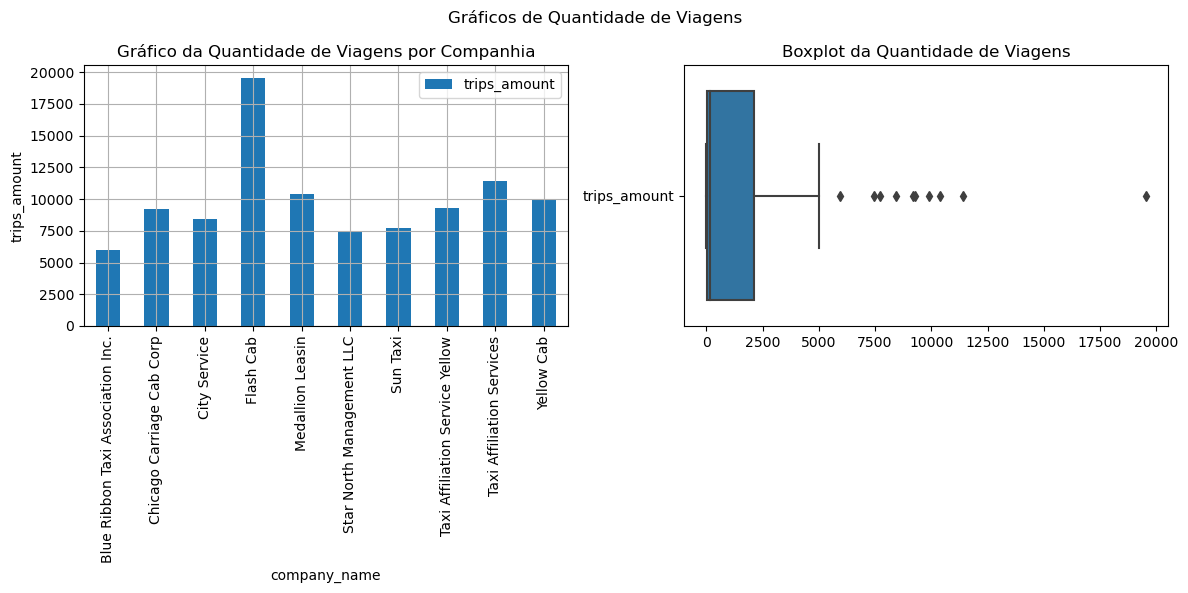

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

fig.suptitle('Gráficos de Quantidade de Viagens')

df1.head(10).pivot_table(index='company_name',values='trips_amount').plot(kind='bar',grid=True, ax= ax[0])
ax[0].set_title('Gráfico da Quantidade de Viagens por Companhia')
ax[0].set_xlabel('company_name')
ax[0].set_ylabel('trips_amount', rotation=90)

sns.boxplot(data=df1, orient= 'h', ax= ax[1])
ax[1].set_title('Boxplot da Quantidade de Viagens')

plt.tight_layout()
plt.show()

A partir dos gráficos podemos identificar que a agência de táxis *Flash Cab* possui mais do que o dobro das viagens do as outras 10 maiores agências, possuindo 20000 viagens no período, a segunda maior fez 11000 viagens. A maior parte das agência fez até 2100 vigens.  

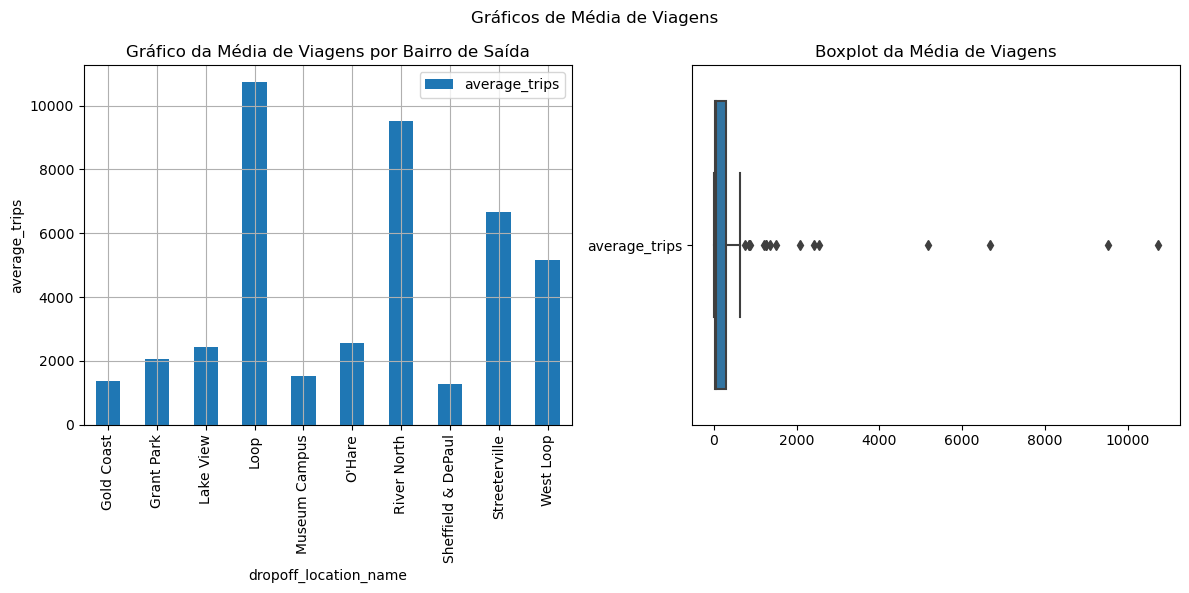

In [16]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

fig.suptitle('Gráficos de Média de Viagens')

df2.head(10).pivot_table(index='dropoff_location_name',values='average_trips').plot(kind='bar',grid=True, ax= ax[0])
ax[0].set_title('Gráfico da Média de Viagens por Bairro de Saída')
ax[0].set_xlabel('dropoff_location_name')
ax[0].set_ylabel('average_trips', rotation=90)

sns.boxplot(data=df2, orient= 'h', ax= ax[1])
ax[1].set_title('Boxplot da Média de Viagens')

plt.tight_layout()
plt.show()

Podemos identificar que os bairros de maior destino foram *Loop* e *River North*, pois possuem as maiores médias de viagem. A maioria dos bairros recebeu poucas viagens, com alguns poucos bairros sendo destino da maioria do passageiros.

## TESTE DE HIPÓTESES

Os testes de hipóteses são testes estatísticos que permitem saber rejeitar que dois grupos amostrais sejam iguais estatisticamente, dados um certo nível de significância. Com a hipótese zero sendo rejeitada se o p-value for menor que a significância.

A hipótese testada será:
- A duração média dos passeios do Loop para o Aeroporto Internacional O'Hare muda nos sábados chuvosos.

Para o teste de hipótese, o nível de significância,  o alfa, será de 5%.

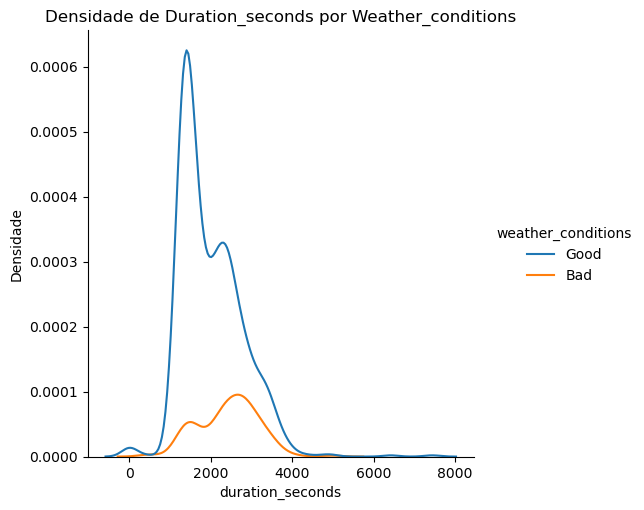

In [17]:
sns.displot(data=df3.query('start_ts.dt.weekday == 5'), x='duration_seconds', hue="weather_conditions", kind="kde")
plt.title('Densidade de Duration_seconds por Weather_conditions')
plt.ylabel('Densidade')
plt.xlabel('duration_seconds')
plt.show()

In [18]:
good = df3.query('weather_conditions == "Good"')['duration_seconds']

bad = df3.query('weather_conditions == "Bad"')['duration_seconds']

In [19]:
print(f'Média de Sábados com tempo Bom: {good.mean()}')
print(f'Variância de Sábados com tempo Bom: {good.var()}\n')

print(f'Média de Sábados com tempo Ruim: {bad.mean()}')
print(f'Variância de Sábados com tempo Ruim: {bad.var()}')


Média de Sábados com tempo Bom: 1999.6756756756756
Variância de Sábados com tempo Bom: 576382.0096895089

Média de Sábados com tempo Ruim: 2427.2055555555557
Variância de Sábados com tempo Ruim: 520294.08600248274


In [20]:
#Teste de Levene
test_levene = levene(good, bad)

print(f'p-value do teste de Levene:{test_levene.pvalue}')

# Teste as hipóteses
if test_levene.pvalue < alpha:
    test = ttest_ind(good, bad, nan_policy='omit', equal_var=False)
else:
    test = ttest_ind(good, bad, nan_policy='omit', equal_var=True)

print(f'p-value: {test.pvalue}')

if test.pvalue < alpha:
    print('Hipótese zero rejeitada')
else:
    print('Hipótese zero não pode ser rejeitada')

p-value do teste de Levene:0.5332038671974493
p-value: 6.517970327099473e-12
Hipótese zero rejeitada


Com o teste estatístico podemos identificar que em sábados chuvosos a duração média dos passeios do Loop para o Aeroporto Internacional O'Hare altera-se. Em sábados chuvosos a média de tempo da viagem é maior.

## CONCLUSÃO

Pela análise e testes estatístico foi identificado alguns fatos importantes. Algumas agências de táxi fazem a maior parte das viagens. Alguns poucos bairros são o destino de grande parte dos passageiros. Em sábados chuvosos a duração média dos passeios do Loop para o Aeroporto Internacional O'Hare tem uma média de tempo de viagem maior. 